In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


In [7]:
df = pd.read_csv("/content/water_potability.csv")

In [8]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [10]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [11]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


<Axes: >

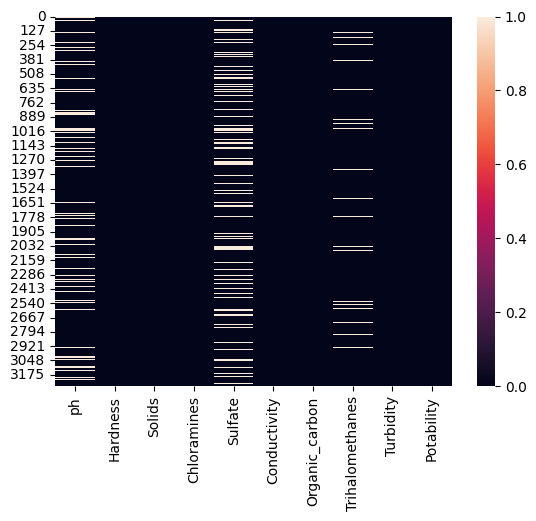

In [12]:
sns.heatmap(df.isnull())

Data Analysis

1.Correlation among Variables


<Axes: >

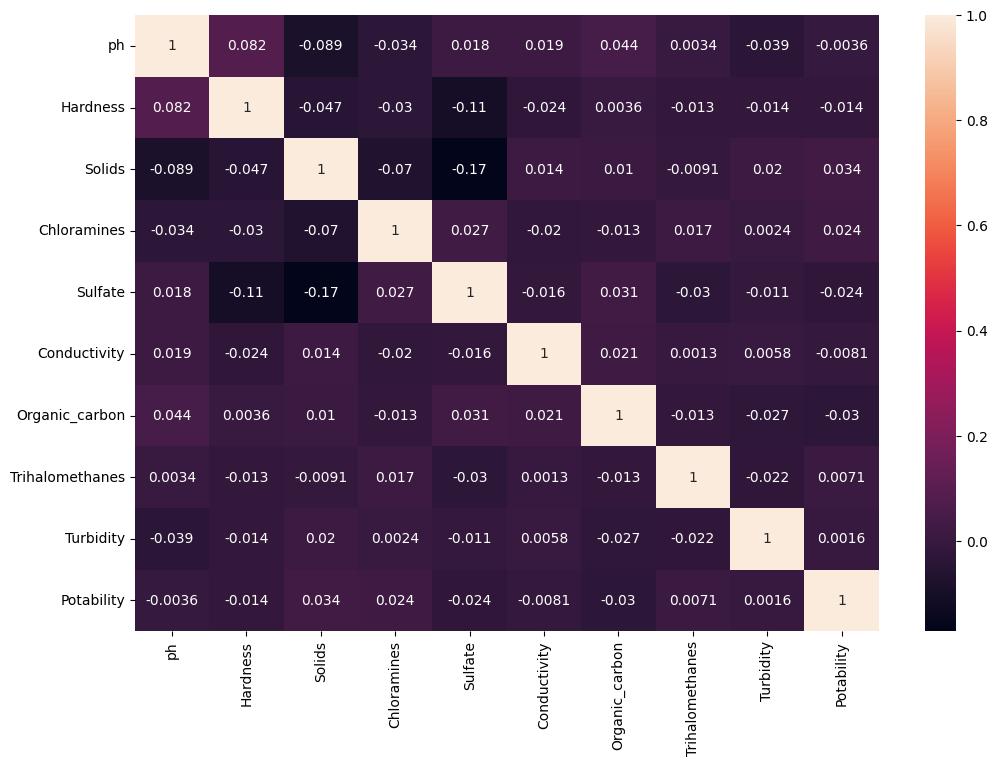

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

Portability

<Axes: xlabel='Potability', ylabel='count'>

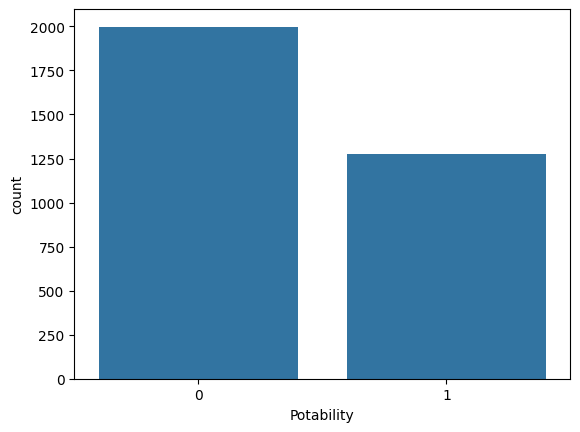

In [14]:
sns.countplot(x="Potability",data=df)

In [15]:
df["Potability"].value_counts()

,count
Potability,
0,1998
1,1278


Visualization dataset also cheking for outliers

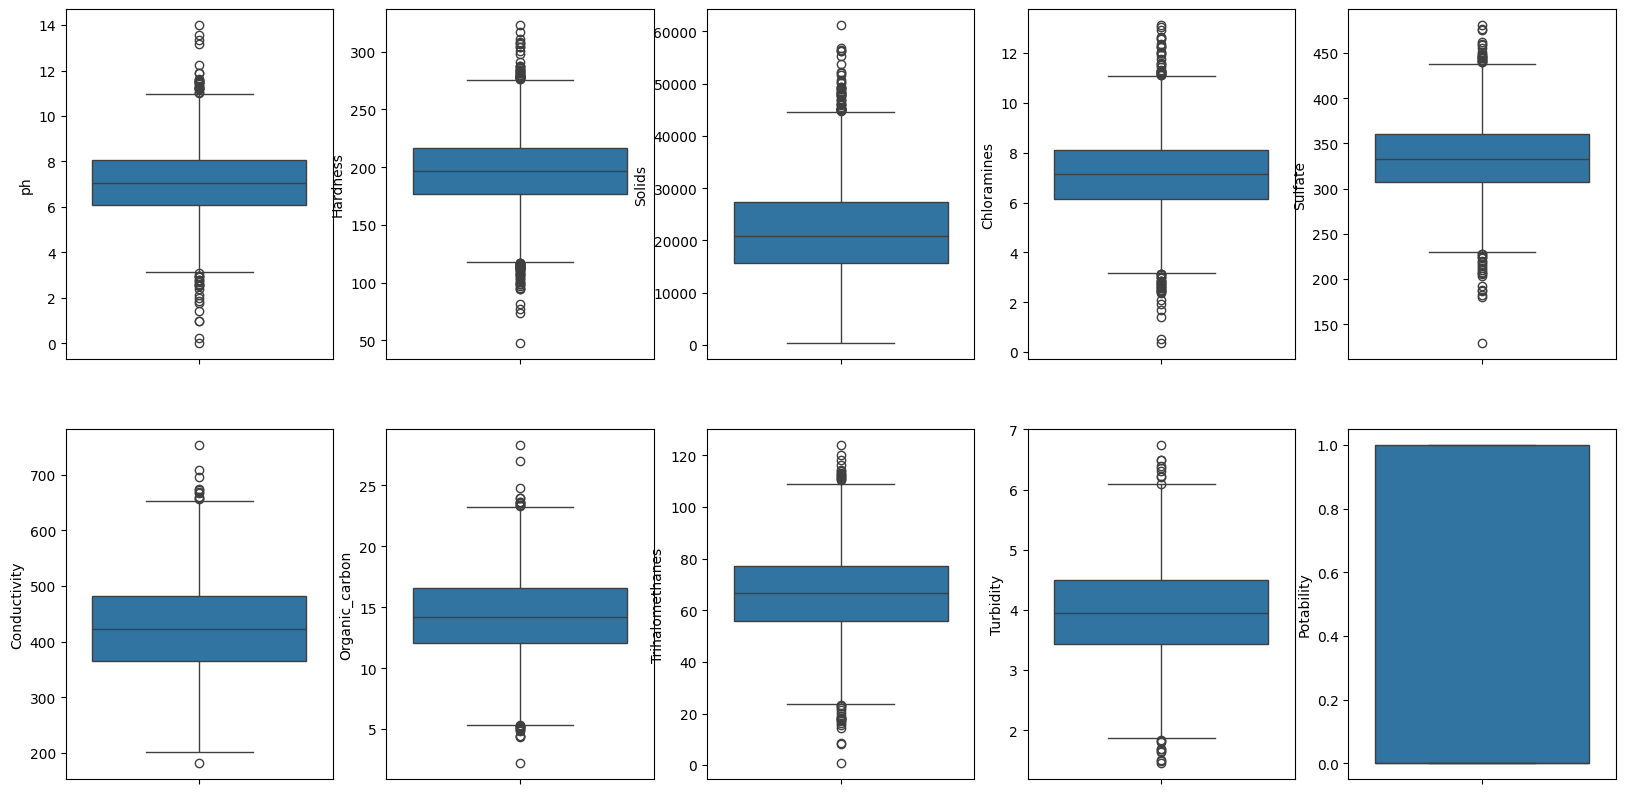

In [16]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize = (20,10))

ax = ax.flatten()

index = 0
for col, value in df.items():
  sns.boxplot(y=col, data=df, ax=ax[index])
  index += 1

In [17]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [18]:
import plotly.express as px

fig = px.pie(df, names="Potability", hole = 0.4)
fig.show()

In [19]:
fig= px.scatter(df, x="ph", y="Sulfate", color="Potability",template="plotly_dark")
fig.show()

Filling and removing null values

Text(0, 0.5, 'Percentage of missing values')

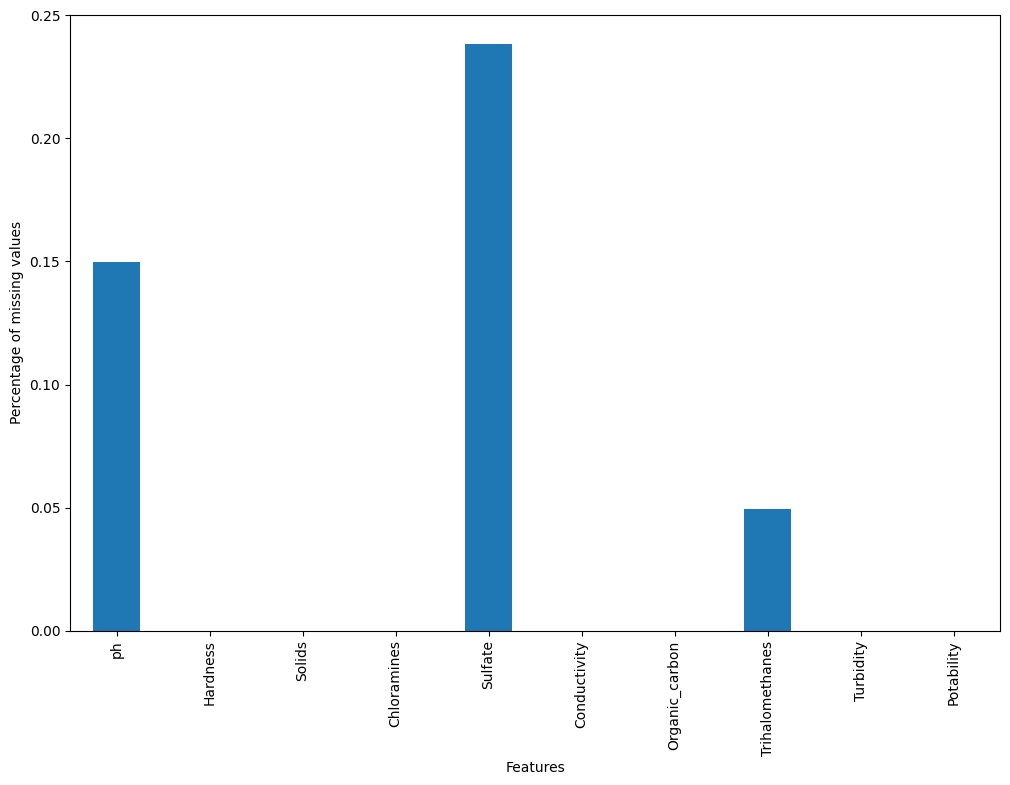

In [20]:
df.isnull().mean().plot.bar(figsize = (12,8))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")

In [21]:
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [22]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [23]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Training the model

In [24]:
x = df.drop("Potability",axis=1)
y = df["Potability"]

In [25]:
x.shape, y.shape

((3276, 9), (3276,))

In [26]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [28]:
x_train.shape, x_test.shape

((2620, 9), (656, 9))

Logistic Regression

In [29]:
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)

LogisticRegression()

Making the Predictions

In [30]:
pred_lr = model_lr.predict(x_test)

In [31]:
pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Accuracy

In [32]:
accuracy_score_lr = accuracy_score(y_test,pred_lr)
accuracy_score_lr

0.6158536585365854

Decision Tree

In [33]:
model_dt = DecisionTreeClassifier(max_depth = 4)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [34]:
pred_dt = model_dt.predict(x_test)
pred_dt

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
accuracy_score_dt = accuracy_score(y_test,pred_dt)
accuracy_score_dt

0.6402439024390244

In [36]:
cm2 = confusion_matrix(y_test,pred_dt)
cm2

array([[384,  21],
       [215,  36]])

Random Forest Classifier

In [37]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
pred_rf = model_rf.predict(x_test)
pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [39]:
accuracy_score_rf = accuracy_score(y_test,pred_rf)
accuracy_score_rf

0.6829268292682927

In [40]:
cm3 = confusion_matrix(y_test,pred_rf)
cm3

array([[362,  43],
       [165,  86]])

KNN

In [41]:
for i in range(4,15):
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(x_train,y_train)
  pred_knn = model_knn.predict(x_test)
  accuracy_score_knn = accuracy_score(y_test,pred_knn)
  print(f"Accuracy score for k = {i} is {accuracy_score_knn}")

Accuracy score for k = 4 is 0.625
Accuracy score for k = 5 is 0.6295731707317073
Accuracy score for k = 6 is 0.6189024390243902
Accuracy score for k = 7 is 0.6310975609756098
Accuracy score for k = 8 is 0.6417682926829268
Accuracy score for k = 9 is 0.6326219512195121
Accuracy score for k = 10 is 0.6371951219512195
Accuracy score for k = 11 is 0.6295731707317073
Accuracy score for k = 12 is 0.6524390243902439
Accuracy score for k = 13 is 0.6463414634146342
Accuracy score for k = 14 is 0.6478658536585366


SVM

In [42]:
model_svm = SVC(kernel="rbf")

In [43]:
model_svm.fit(x_train,y_train)

SVC()

In [44]:
pred_svm = model_svm.predict(x_test)


In [45]:
accuracy_score_svm = accuracy_score(y_test,pred_svm)
accuracy_score_svm

0.6829268292682927

Ada Boost Classifier

In [49]:
model_ada = AdaBoostClassifier(n_estimators=100)
model_ada.fit(x_train,y_train)
pred_ada = model_ada.predict(x_test)
accuracy_score_ada = accuracy_score(y_test,pred_ada)
accuracy_score_ada

0.6158536585365854

XGB Classifier

In [54]:
model_xgb = XGBClassifier(n_estimators=100,learning_rate=0.04)
model_xgb.fit(x_train,y_train)
pred_xgb = model_xgb.predict(x_test)
accuracy_score_xgb = accuracy_score(y_test,pred_xgb)
accuracy_score_xgb

0.6554878048780488

In [60]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Ada Boost', 'XGBoost'],
    'Accuracy Score': [accuracy_score_lr, accuracy_score_dt, accuracy_score_rf, accuracy_score_knn, accuracy_score_svm, accuracy_score_ada, accuracy_score_xgb]})


In [61]:
models

,Model,Accuracy Score
0,Logistic Regression,0.615854
1,Decision Tree,0.640244
2,Random Forest,0.682927
3,KNN,0.647866
4,SVM,0.682927
5,Ada Boost,0.615854
6,XGBoost,0.655488


,Model,Accuracy Score
2,Random Forest,0.682927
4,SVM,0.682927
6,XGBoost,0.655488
3,KNN,0.647866
1,Decision Tree,0.640244
0,Logistic Regression,0.615854
5,Ada Boost,0.615854


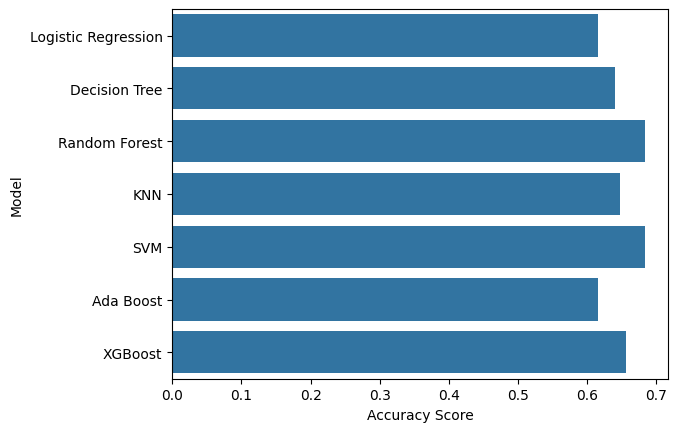

from matplotlib import pyplot as plt
_df_0['Accuracy Score'].plot(kind='hist', bins=20, title='Accuracy Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Accuracy Score'].plot(kind='line', figsize=(8, 4), title='Accuracy Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Accuracy Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [63]:
sns.barplot(x="Accuracy Score",y="Model",data=models)
models.sort_values(by='Accuracy Score',ascending=False)